In [1]:
import math
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
pd.set_option("display.max_columns",200)

from IPython.core.pylabtools import figsize

figsize(20, 6)

In [3]:
train = pd.read_csv(r'../input/train.csv', encoding="UTF8").drop(['Unnamed: 0'],axis=1)
test = pd.read_csv(r'../input/test.csv', encoding="UTF8")

print(train.shape)
print(test.shape)

(13730, 166)
(4576, 47)


In [4]:
train.shape

(13730, 166)

In [5]:
test.shape

(4576, 47)

In [6]:
nota = train['NU_NOTA_MT']
train = train[test.columns]
train['NU_NOTA_MT'] = nota
train.shape

(13730, 48)

In [7]:
numerical_train = train.select_dtypes(exclude = 'object').columns
numerical_test = test.select_dtypes(exclude = 'object').columns

In [8]:
train[numerical_train] = train.loc[:,numerical_train].fillna(0)
test[numerical_test] = test.loc[:,numerical_test].fillna(0)

In [9]:
insc_train = train['NU_INSCRICAO']
insc_test = test['NU_INSCRICAO']
nota = train['NU_NOTA_MT']

train = train.iloc[:,1:-1]
test = test.iloc[:, 1:]

In [10]:
dummies = pd.get_dummies(train.append(test))

In [11]:
rows = train.shape[0]

train = dummies.iloc[:rows]
test = dummies.iloc[rows:]

train['NU_NOTA_MT'] = nota
train['NU_INSCRICAO'] = insc_train
test['NU_INSCRICAO'] = insc_test

In [12]:
X = train.drop(['NU_NOTA_MT','NU_INSCRICAO'], axis = 1)
y = train['NU_NOTA_MT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
train.shape

(13730, 162)

In [14]:
scaler = StandardScaler()  

X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [15]:
lr_mdl = LinearRegression(fit_intercept=True)

In [16]:
lr_mdl.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = lr_mdl.predict(X_test)

In [18]:
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)

In [19]:
lr_scores = pd.DataFrame({'Linear Regression' : [r2, rmse, mae]}, index=['R2', 'RMSE', 'MAE'])
lr_scores.to_csv('../results/lr_scores.csv', sep=';', index=False)
lr_scores

,Linear Regression
R2,-1.421926e+21
RMSE,8.731071e+12
MAE,1.297091e+11


In [26]:
lr_mdl.score(X_test, y_test)

-1.4219260516880582e+21

In [20]:
rfe = RFE(lr_mdl)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

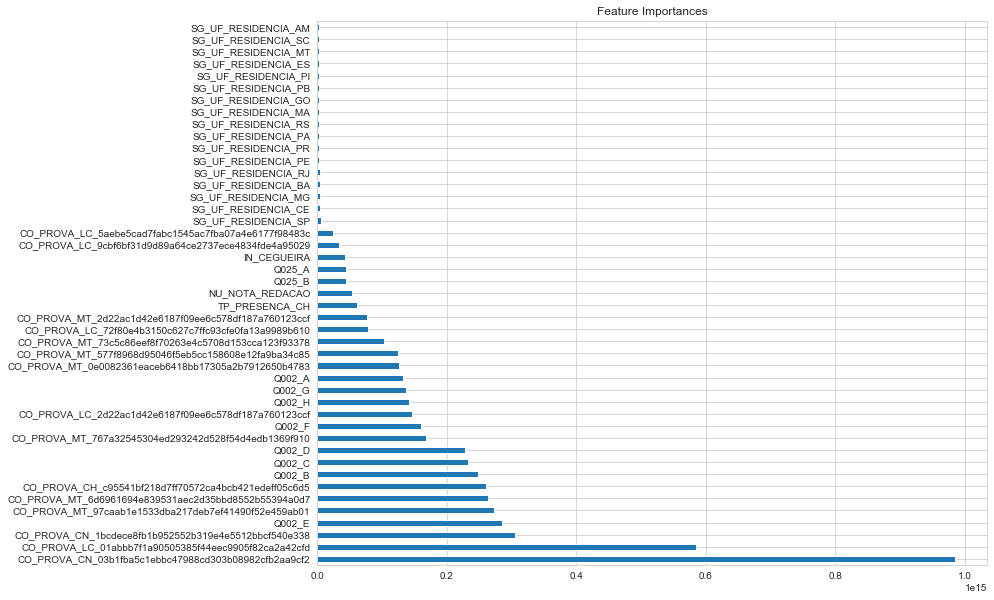

In [22]:
plt.rcParams['figure.figsize'] = [12, 10]
plt.grid()
plt.title('Feature Importances')
pd.Series(lr_mdl.coef_, index= X.columns).nlargest(45).plot(kind='barh')
plt.show();

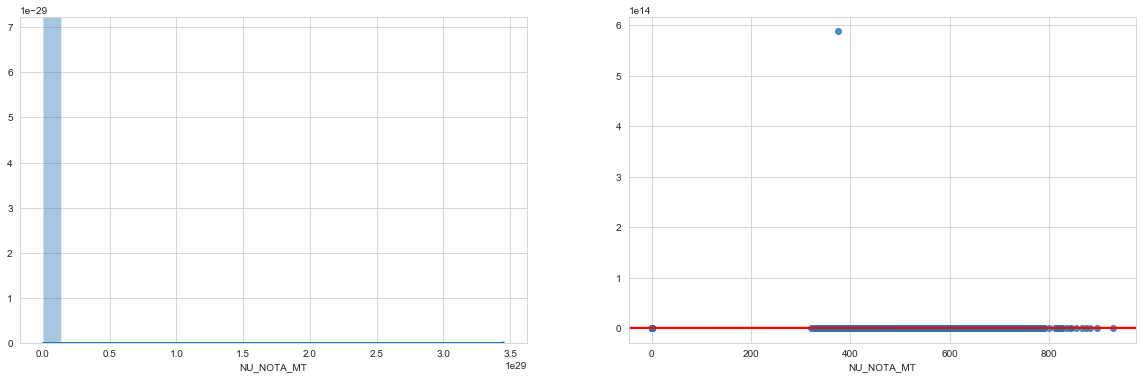

In [25]:
RSS = ((y_test - y_pred) **2 )

fig, ax =plt.subplots(1,2)
sns.distplot(RSS, bins= 25, hist_kws={'density':True}, ax=ax[0]);
sns.regplot(x = y_test , y = y_pred, line_kws={"color": "red"}, ax=ax[1]);
fig.show()

In [44]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = test['NU_INSCRICAO']
print(answer.shape)
answer.head()

(4576, 1)


,NU_INSCRICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,b38a03232f43b11c9d0788abaf060f7366053b6d
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d
4,715494628a50142ce8cb17191cfe6d0f3cae0934


In [45]:
answer['NU_NOTA_MT'] = np.around(y_pred,2)
print(answer.shape)
answer.head()

(4576, 2)


,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,438.74
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,433.32
2,b38a03232f43b11c9d0788abaf060f7366053b6d,583.95
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-15.82
4,715494628a50142ce8cb17191cfe6d0f3cae0934,540.30


In [46]:
print(answer.shape)
answer.to_csv('../answer.csv', index=False)

(4576, 2)


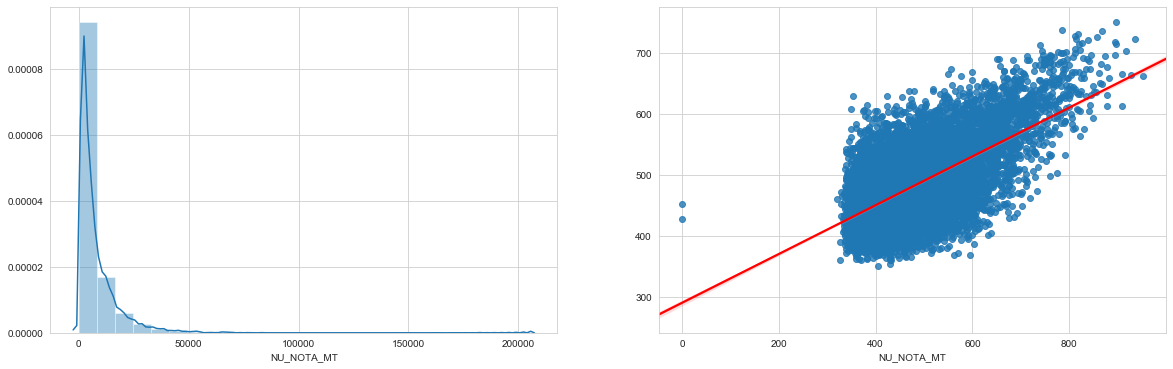

In [80]:
RSS = ((y_train - y_pred_train) **2 )

fig, ax =plt.subplots(1,2)
sns.distplot(RSS, bins= 25, hist_kws={'density':True}, ax=ax[0]);
sns.regplot(x = y_train , y = y_pred_train, line_kws={"color": "red"}, ax=ax[1]);
fig.show()